# Data Prep

In [1]:
import pandas as pd
import numpy as np
import random
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score, rand_score

random.seed(42)

df = pd.read_csv("data.csv")

In [2]:
def subset(df, authors):
    max_samples = min(df["author"].value_counts()[authors])
    df_authors = pd.concat(
        [df[df["author"] == author].sample(max_samples) for author in authors]
    ).reset_index(drop=True)
    return df_authors

def expand_df(df, vector_names):
    df_columns = []
    for column in vector_names:
        df_column = df[column].apply(ast.literal_eval).apply(pd.Series)
        df_columns.append(df_column)
    return pd.concat(df_columns, axis=1)

def standardize_cols(df):
    standardizer = StandardScaler()
    return standardizer.fit_transform(df)

def cluster_graph(authors, vector_names):
    df_authors = subset(df, authors)
    df_expanded = expand_df(df_authors, vector_names)
    data = standardize_cols(df_expanded)
    
    # PCA
    pca = PCA(n_components=25)
    data_pca = pca.fit_transform(data)
    
    # Spectral Clusters
    clusterer = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', gamma = 0.5)
    spectral_labels = clusterer.fit_predict(data)
    
    # KMeans
    kmeans = KMeans(n_clusters=len(authors), n_init=10)
    kmeans.fit(data)
    labels_kmeans = kmeans.labels_
    
    # Prints Rand Indexes and Adjusted Rand Indexes
    print(f"{vector_names} scores:")
    
    ari = adjusted_rand_score(df_authors["author"], labels_kmeans)
    ri = rand_score(df_authors["author"], labels_kmeans)
    print(f'KMeans Adjusted Rand Index: {ari}')
    print(f'KMeans Rand Index: {ri}')

    ari = adjusted_rand_score(df_authors["author"], spectral_labels)
    ri = rand_score(df_authors["author"], spectral_labels)
    print(f'Spectral Clustering Adjusted Rand Index: {ari}')
    print(f'Spectral Clustering Rand Index: {ri}')
    
    # Create Plots
    plt.figure(figsize=(12, 12))

    # Plot PCA
    plt.subplot(221)
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df_authors["author"], palette="viridis")
    plt.title("PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Author")
    
    # PCA Elbow Plot
    plt.subplot(222)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
    plt.title('Elbow Plot for PCA')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')

    # Plot Spectral
    plt.subplot(223)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=spectral_labels, cmap="viridis")
    plt.title("Spectral Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    
    # Plot KMeans
    plt.subplot(224)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_kmeans, cmap="viridis")
    plt.title("KMeans Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    
    plt.suptitle(f"Authors: {authors}, Vectors: {vector_names}")
    
    plt.show()

def cluster(authors, vector_names):
    df_authors = subset(df, authors)
    df_expanded = expand_df(df_authors, vector_names)
    data = standardize_cols(df_expanded)
    
    # Spectral Clusters
    clusterer = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', gamma = 0.5)
    spectral_labels = clusterer.fit_predict(data)
    
    # KMeans
    kmeans = KMeans(n_clusters=len(authors), n_init=10)
    kmeans.fit(data)
    labels_kmeans = kmeans.labels_
    
    # Calculate ari and ri
    Kmeans_ari = adjusted_rand_score(df_authors["author"], labels_kmeans)
    Kmeans_ri = rand_score(df_authors["author"], labels_kmeans)
    Spectral_ari = adjusted_rand_score(df_authors["author"], spectral_labels)
    Spectral_ri = rand_score(df_authors["author"], spectral_labels)
    
    return Kmeans_ari, Kmeans_ri, Spectral_ari, Spectral_ri
    

In [3]:
list_of_vector_names = [["common"],
                        ["function"],
                        ["common", "function"],
                        ["bert"],
                        ["common", "function", "bert"]]

# Reddit vs. GPT (temp 1.0)

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common'] scores:
KMeans Adjusted Rand Index: 0.08280302848575827
KMeans Rand Index: 0.5414016572858036
Spectral Clustering Adjusted Rand Index: 0.016546815606907236
Spectral Clustering Rand Index: 0.5081425891181989


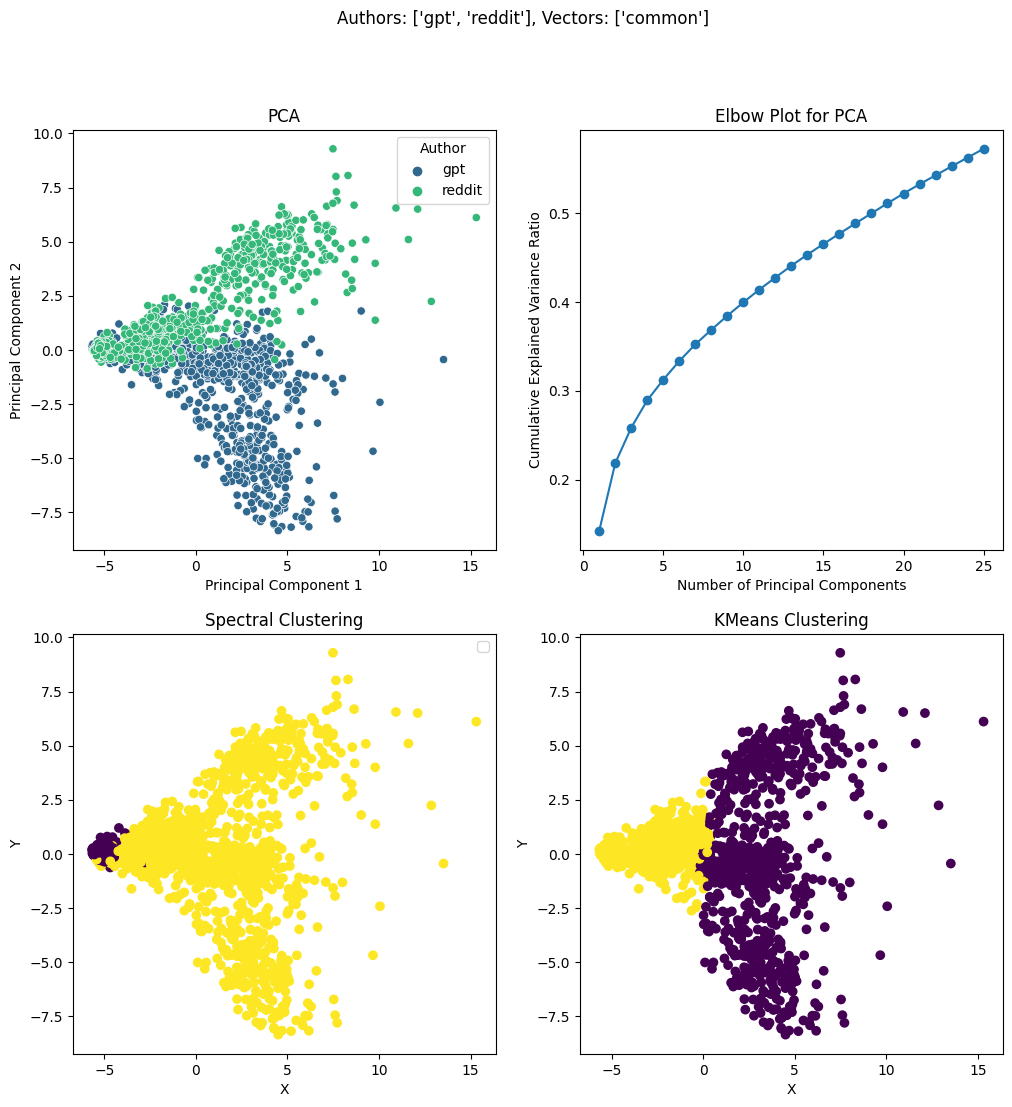

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['function'] scores:
KMeans Adjusted Rand Index: 0.08065040650406505
KMeans Rand Index: 0.5403252032520325
Spectral Clustering Adjusted Rand Index: 0.0012398903908984306
Spectral Clustering Rand Index: 0.5003447467166979


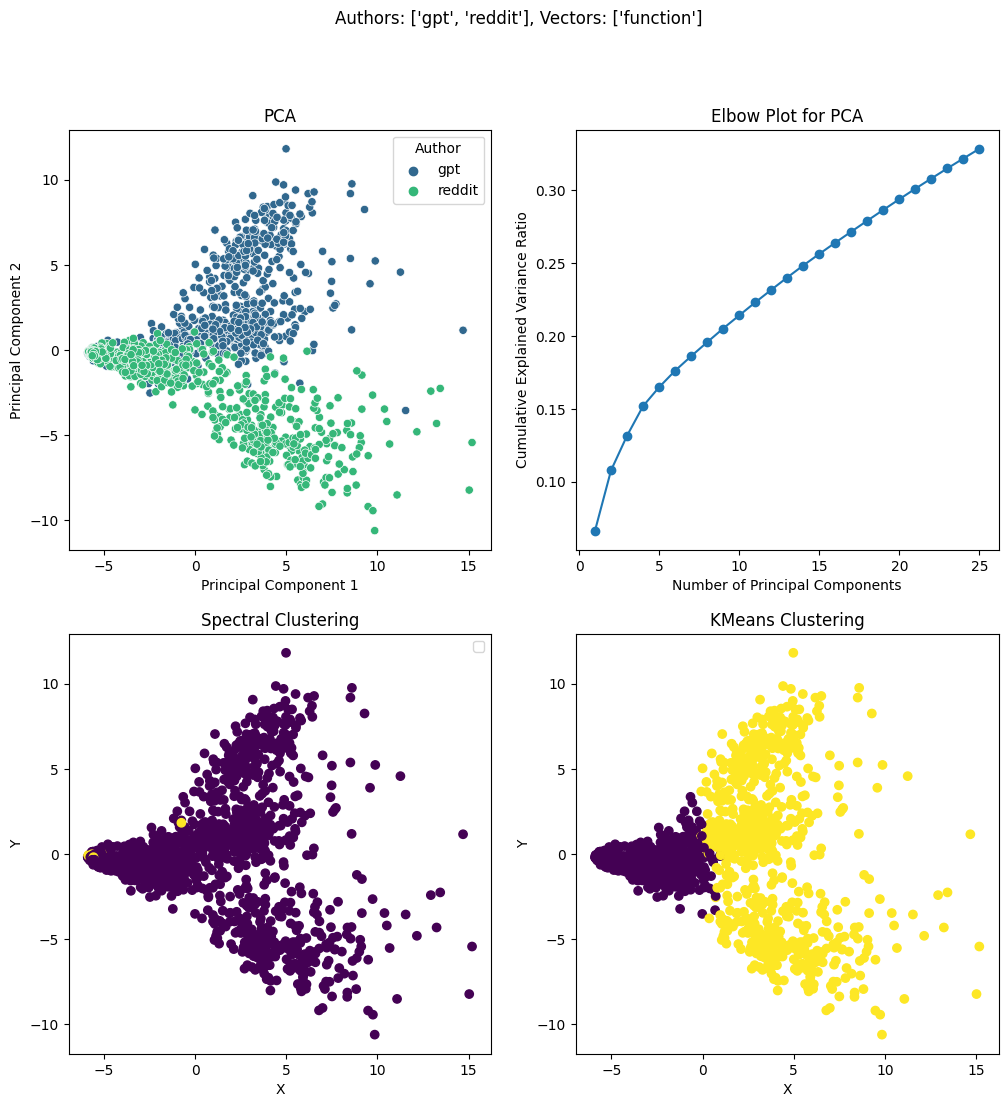

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function'] scores:
KMeans Adjusted Rand Index: 0.08425425809984373
KMeans Rand Index: 0.5421271106941838
Spectral Clustering Adjusted Rand Index: 0.0016303539332824658
Spectral Clustering Rand Index: 0.5005386178861788


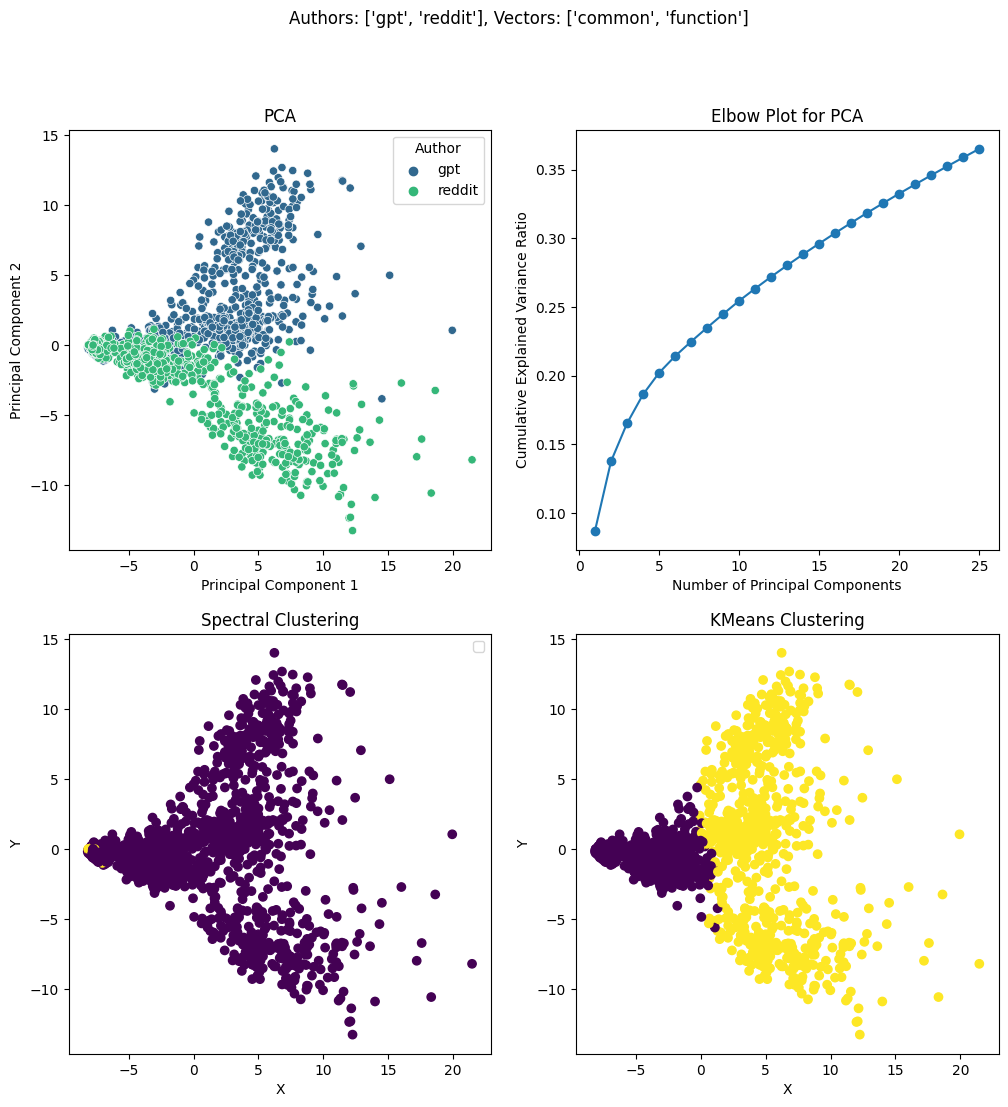

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['bert'] scores:
KMeans Adjusted Rand Index: 0.8394136371779755
KMeans Rand Index: 0.9197068480300188
Spectral Clustering Adjusted Rand Index: 0.0492687901645228
Spectral Clustering Rand Index: 0.5244559099437148


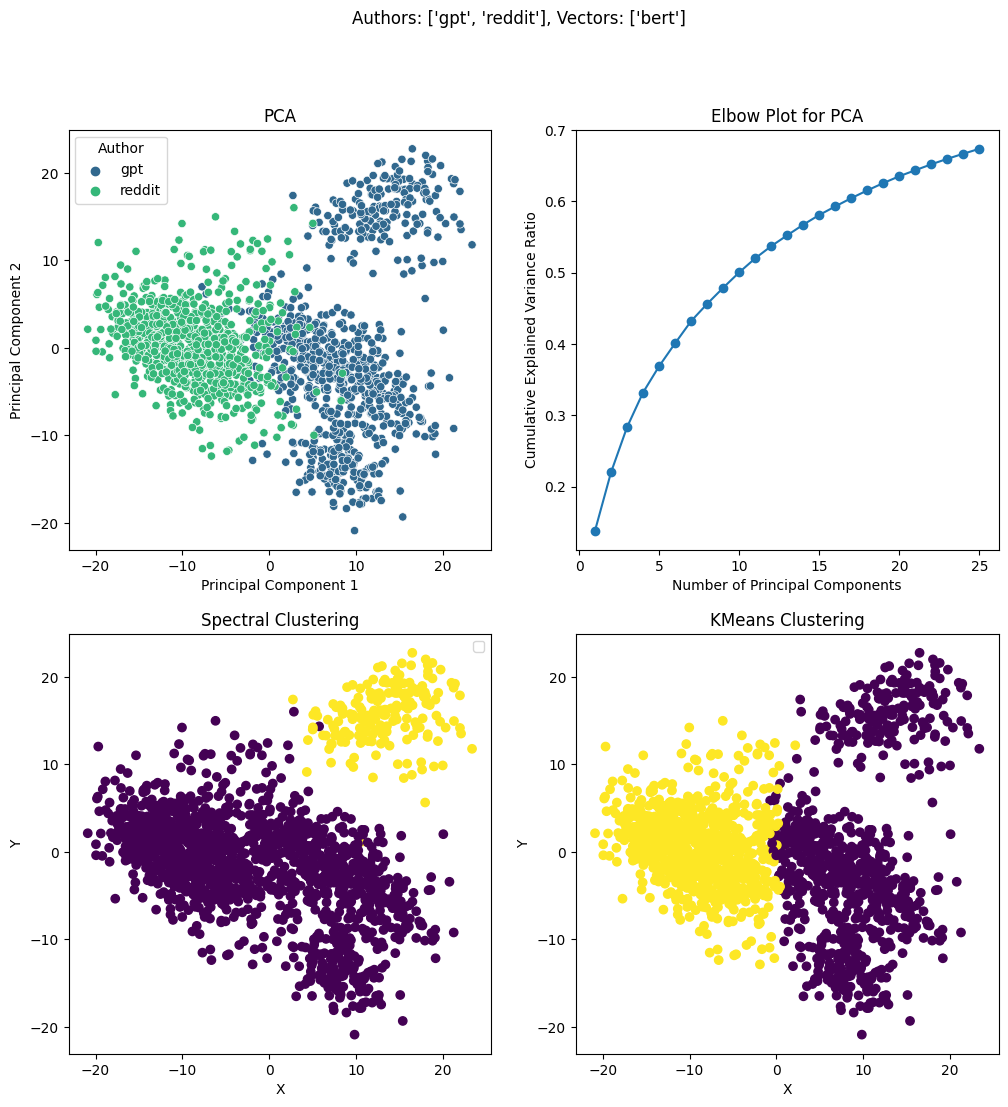

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function', 'bert'] scores:
KMeans Adjusted Rand Index: 0.9119699481857017
KMeans Rand Index: 0.955984990619137
Spectral Clustering Adjusted Rand Index: 0.0492687901645228
Spectral Clustering Rand Index: 0.5244559099437148


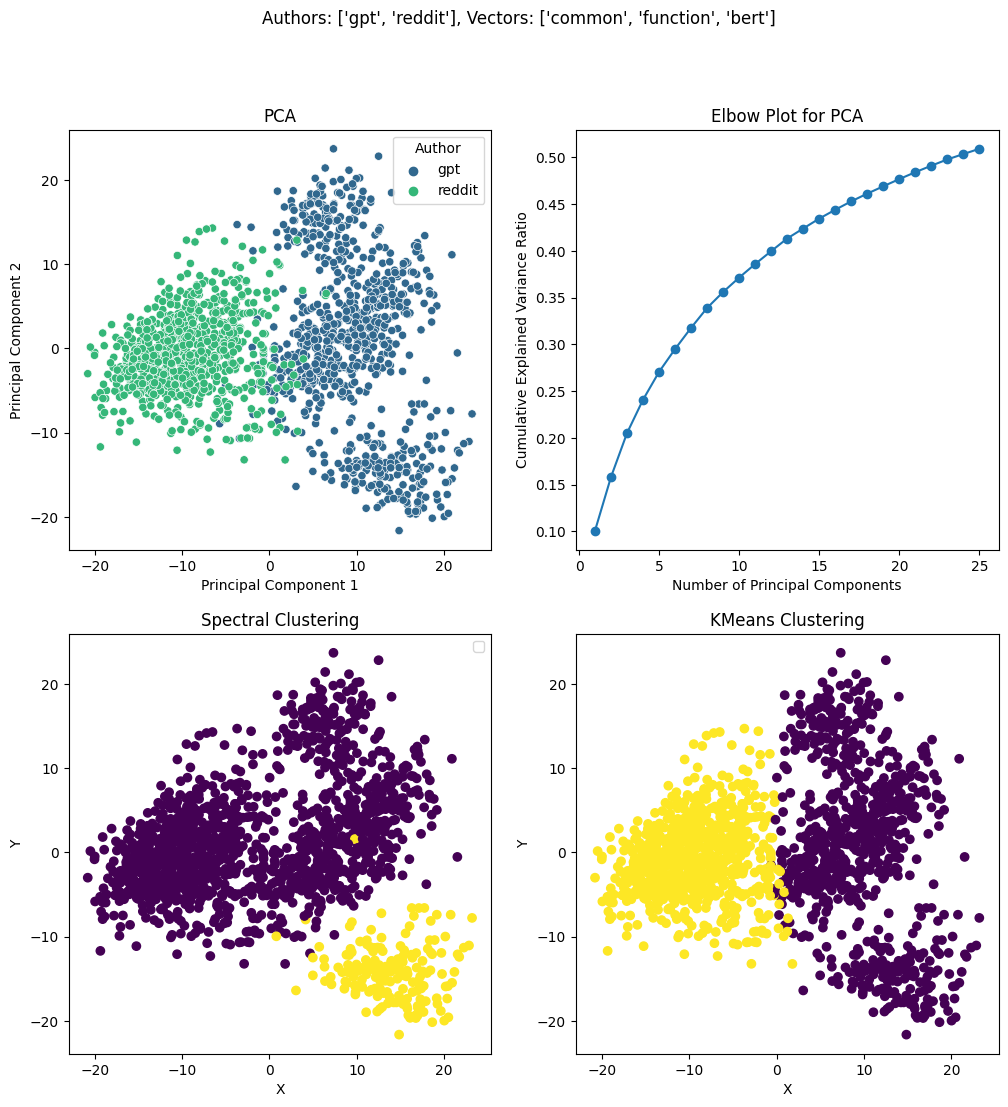

In [4]:
for vector_names in list_of_vector_names:
    cluster_graph(["gpt", "reddit"], vector_names)
    print("\n")

# Reddit vs. Bard

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common'] scores:
KMeans Adjusted Rand Index: -0.00034616387677636015
KMeans Rand Index: 0.49979987492182615
Spectral Clustering Adjusted Rand Index: 0.04545180686771328
Spectral Clustering Rand Index: 0.5225461225766104


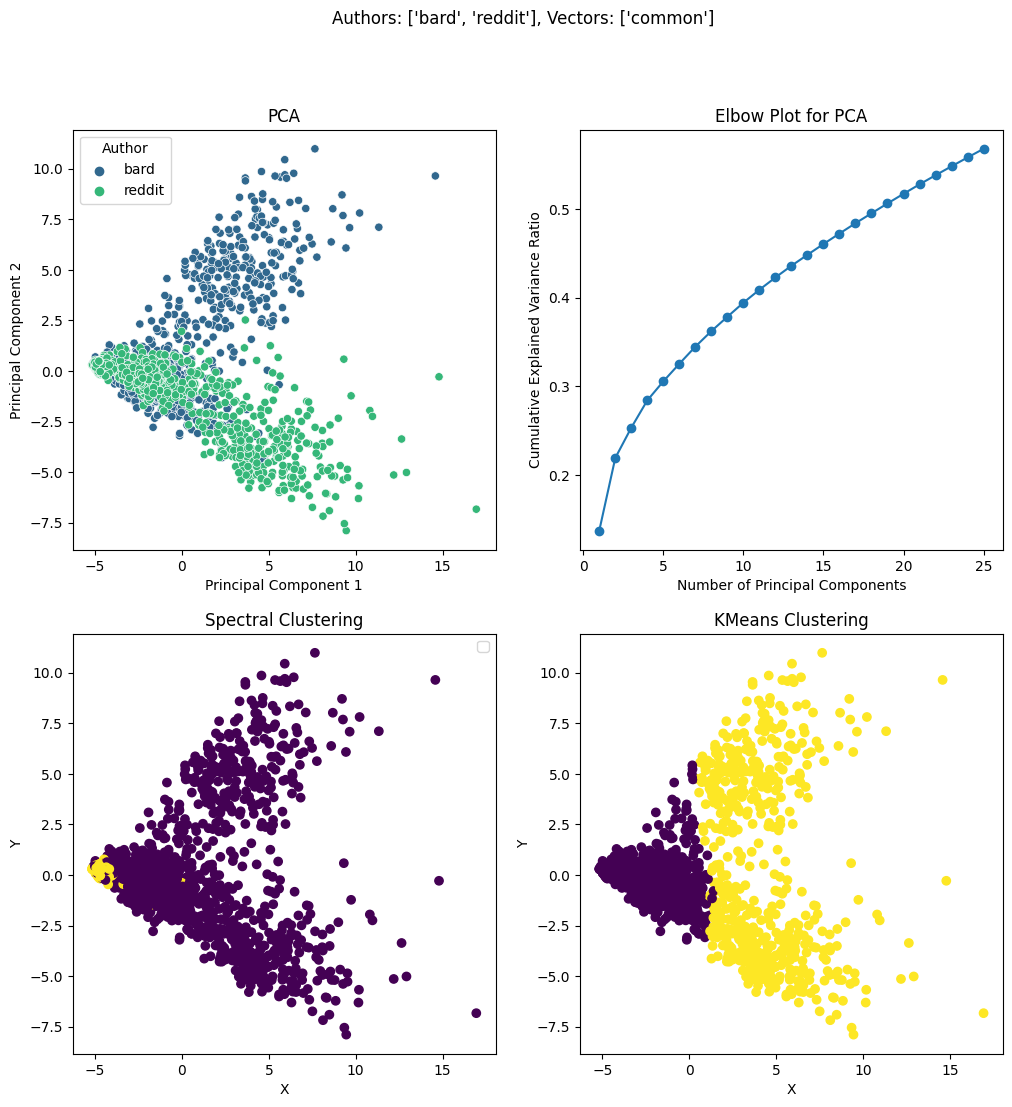

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['function'] scores:
KMeans Adjusted Rand Index: -0.0004595910235908218
KMeans Rand Index: 0.4997373358348968
Spectral Clustering Adjusted Rand Index: 0.00024083580154704286
Spectral Clustering Rand Index: 0.4998194183864916


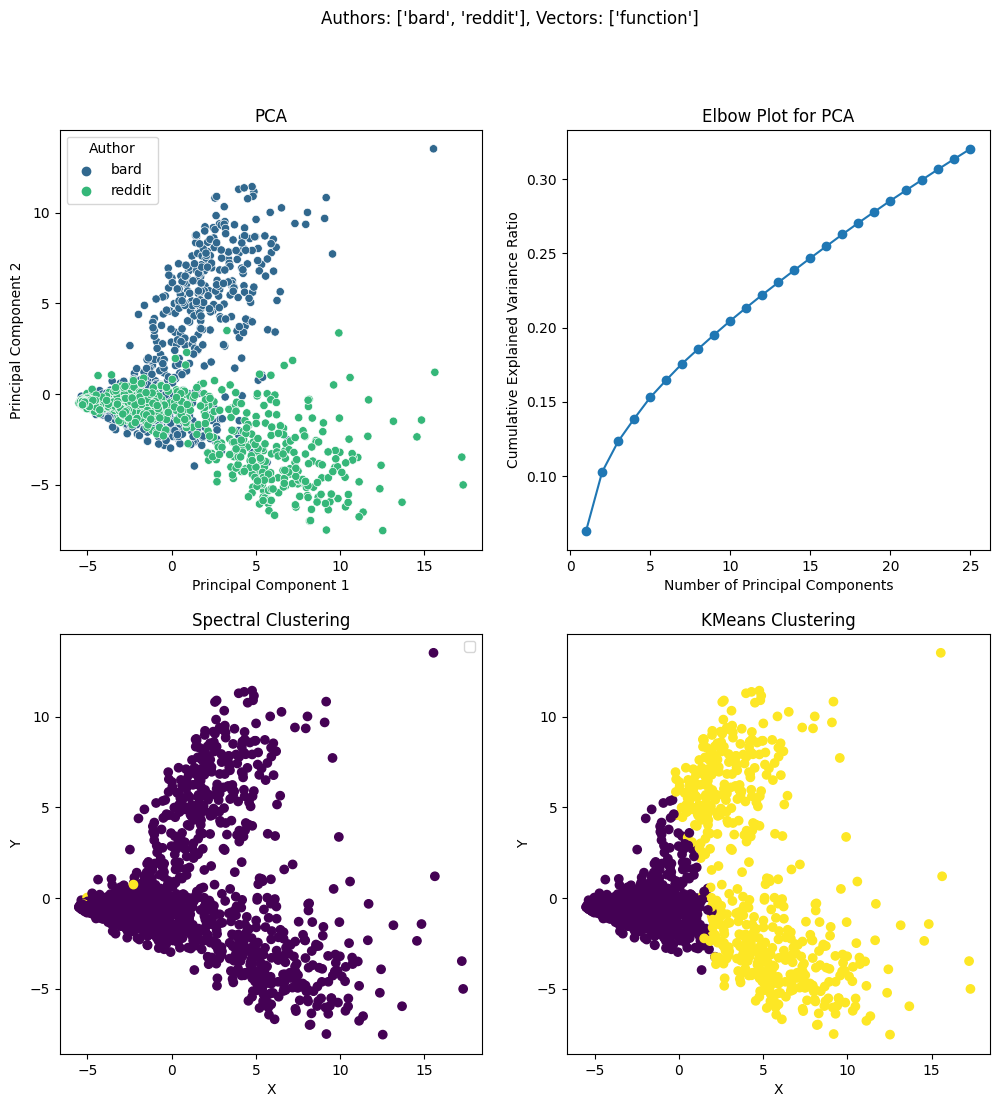

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function'] scores:
KMeans Adjusted Rand Index: -0.0005386398957799382
KMeans Rand Index: 0.4996998123827392
Spectral Clustering Adjusted Rand Index: 0.0001627700714366327
Spectral Clustering Rand Index: 0.49978189493433395


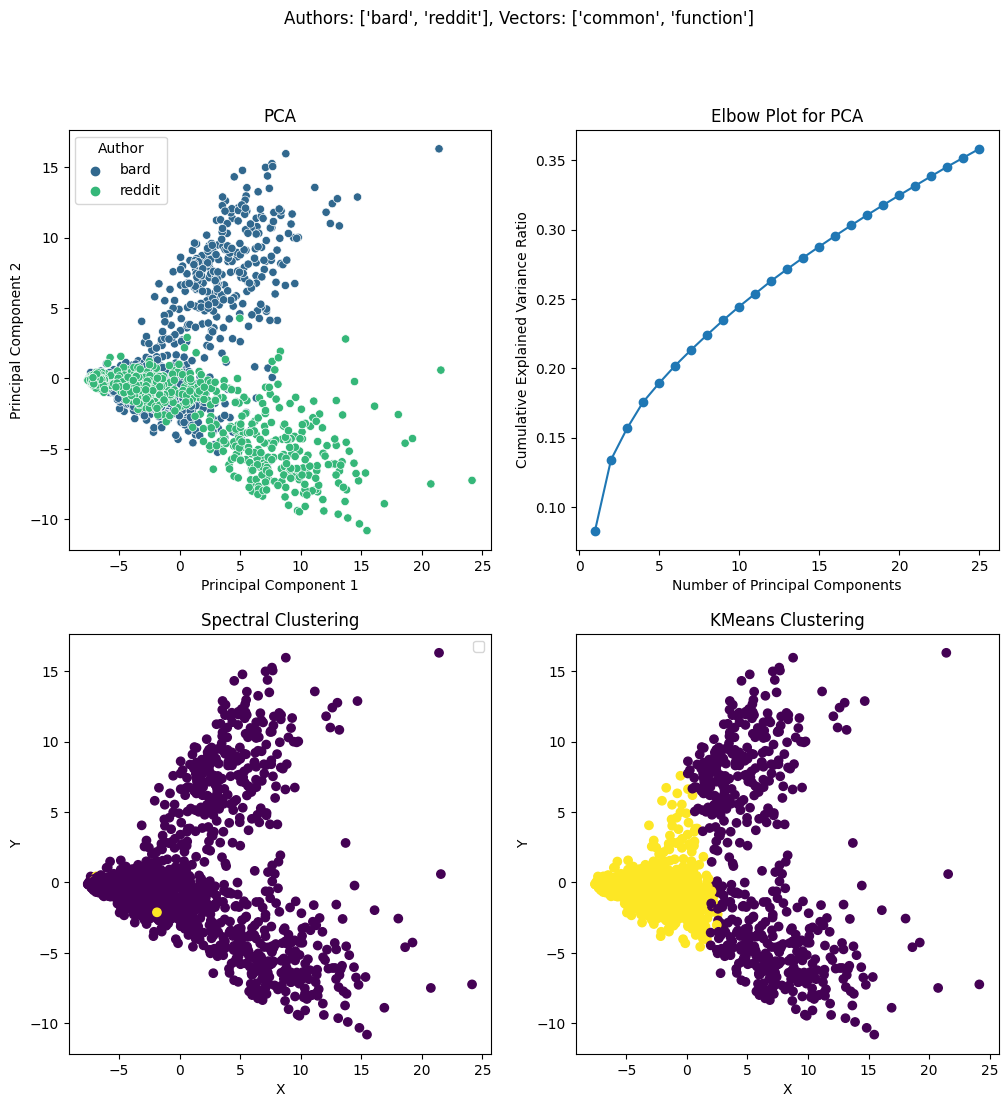

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['bert'] scores:
KMeans Adjusted Rand Index: 0.443566677965329
KMeans Rand Index: 0.7217706378986867
Spectral Clustering Adjusted Rand Index: 0.008446835766965827
Spectral Clustering Rand Index: 0.503968105065666


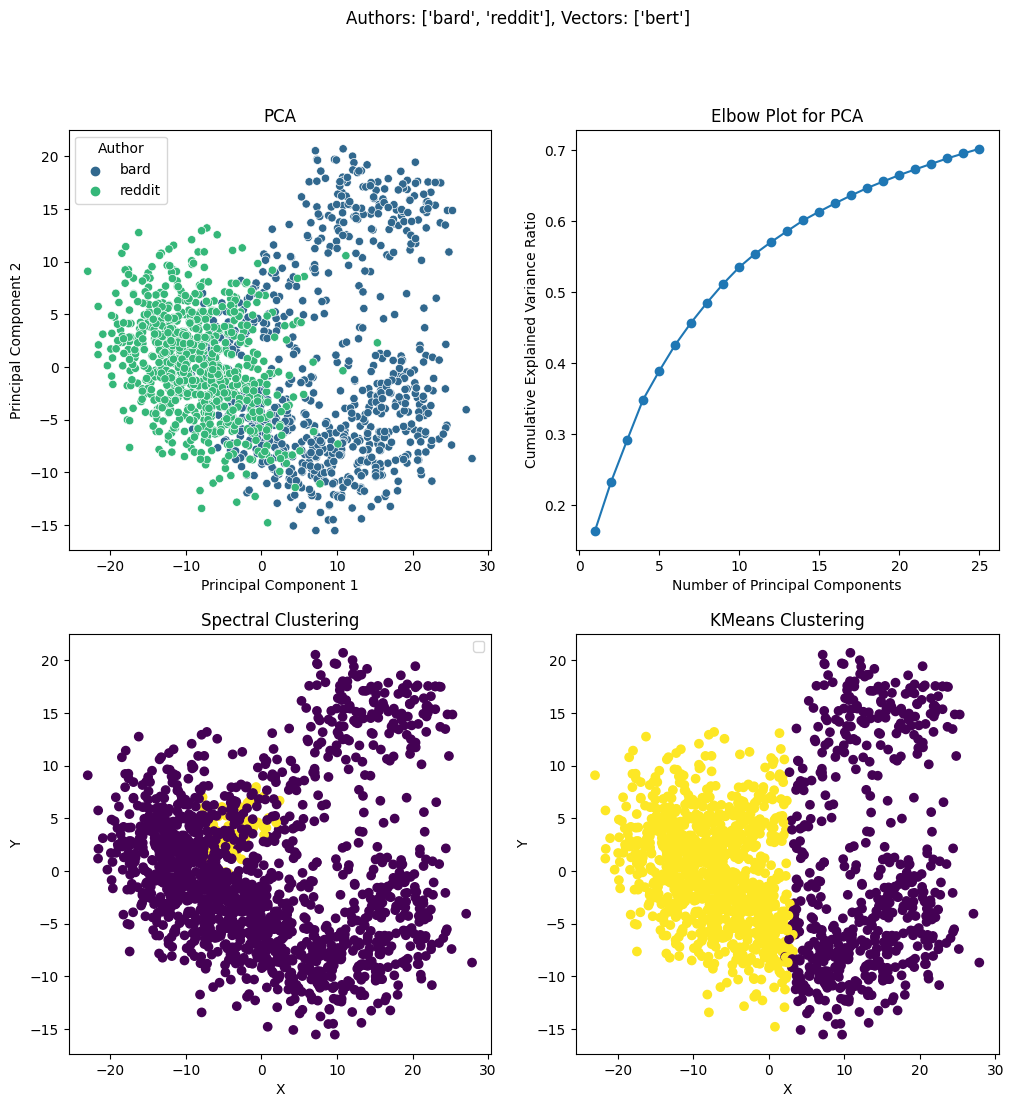

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function', 'bert'] scores:
KMeans Adjusted Rand Index: 0.4723485688277517
KMeans Rand Index: 0.7361632270168855
Spectral Clustering Adjusted Rand Index: 0.008678268231051563
Spectral Clustering Rand Index: 0.504084584115072


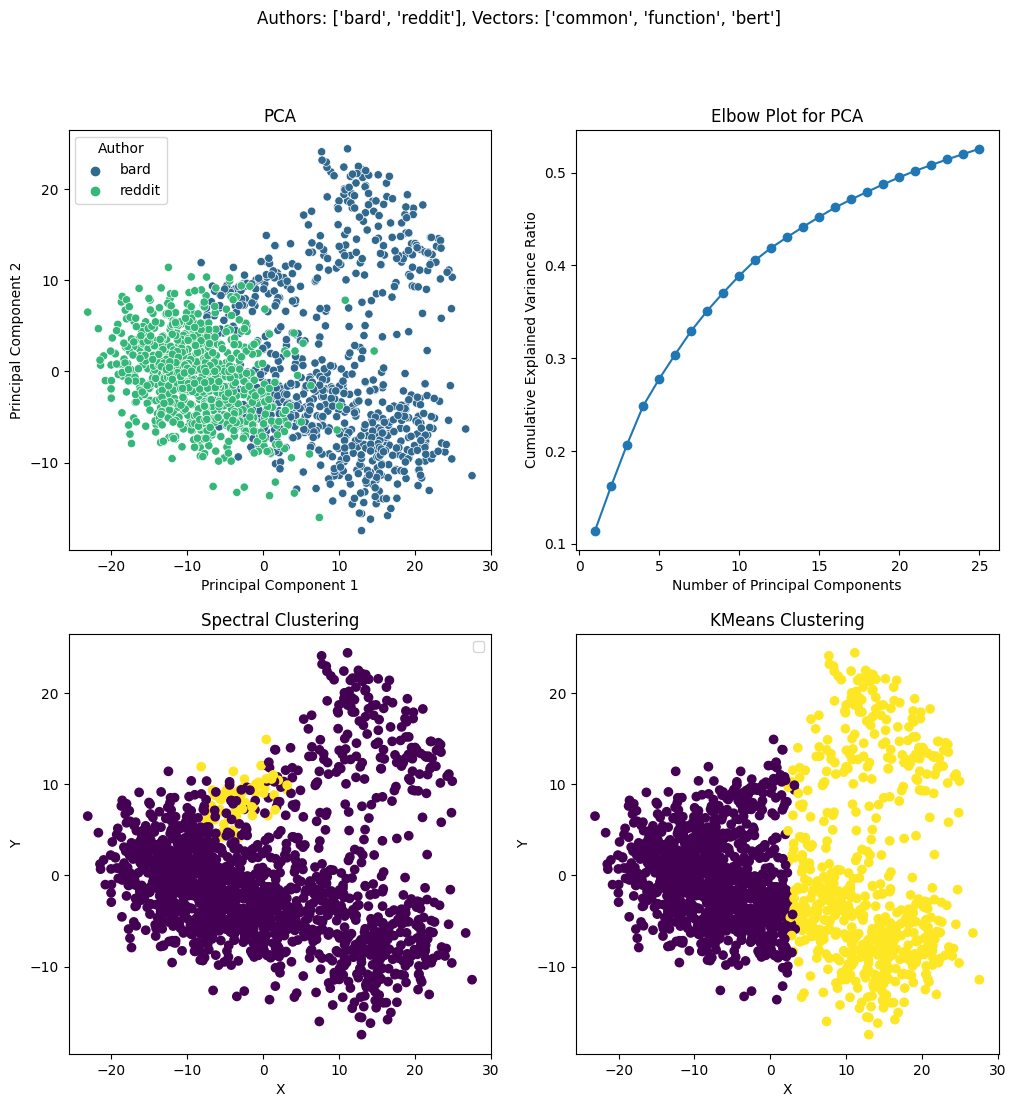

In [5]:
for vector_names in list_of_vector_names:
    cluster_graph(["bard", "reddit"], vector_names)
    print("\n")

# GPT (temp 1.0) vs. Bard

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common'] scores:
KMeans Adjusted Rand Index: 0.09018421586493358
KMeans Rand Index: 0.5450914634146341
Spectral Clustering Adjusted Rand Index: 0.01279842273965138
Spectral Clustering Rand Index: 0.5061608818011257


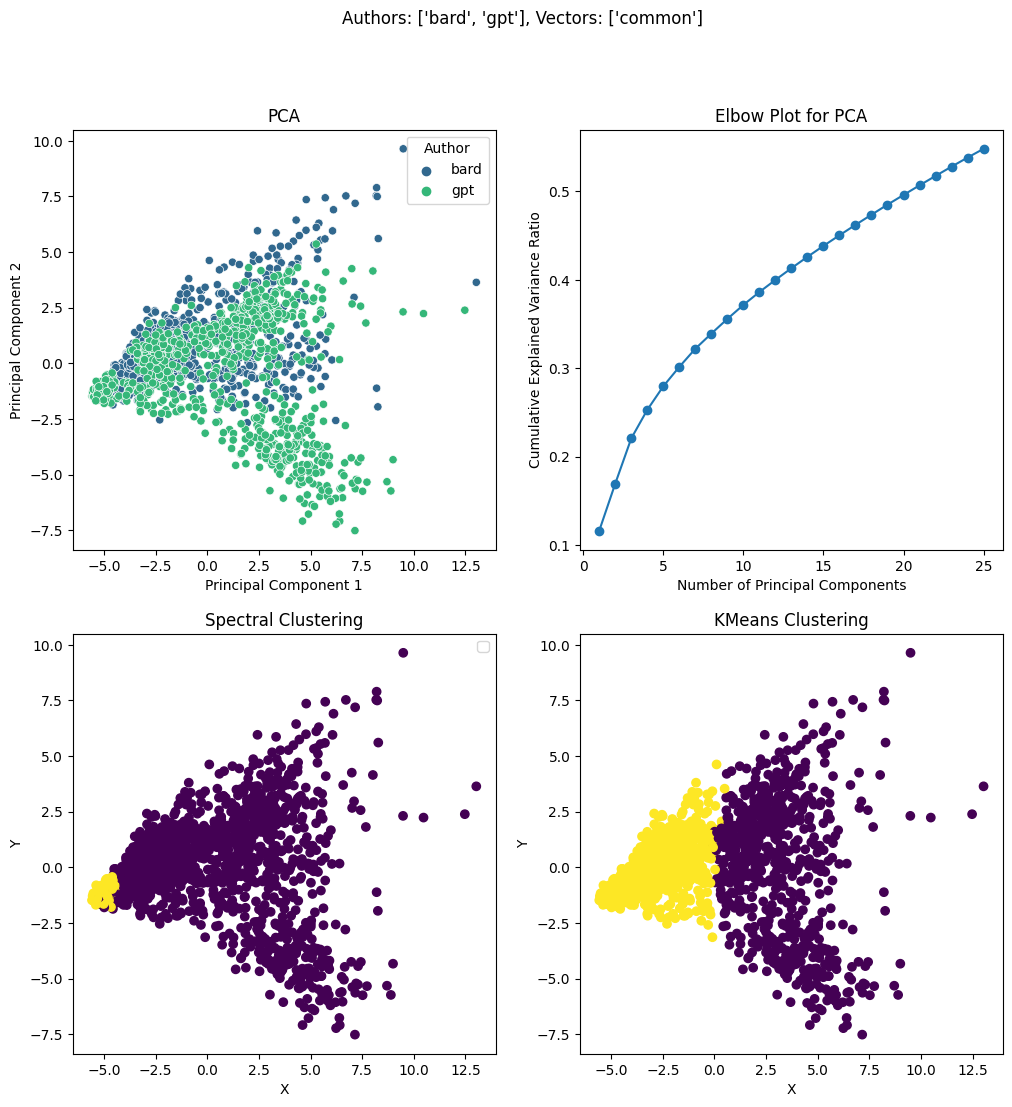

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['function'] scores:
KMeans Adjusted Rand Index: 0.11251095066421893
KMeans Rand Index: 0.5562546904315196
Spectral Clustering Adjusted Rand Index: 0.051517056867542356
Spectral Clustering Rand Index: 0.5255816135084428


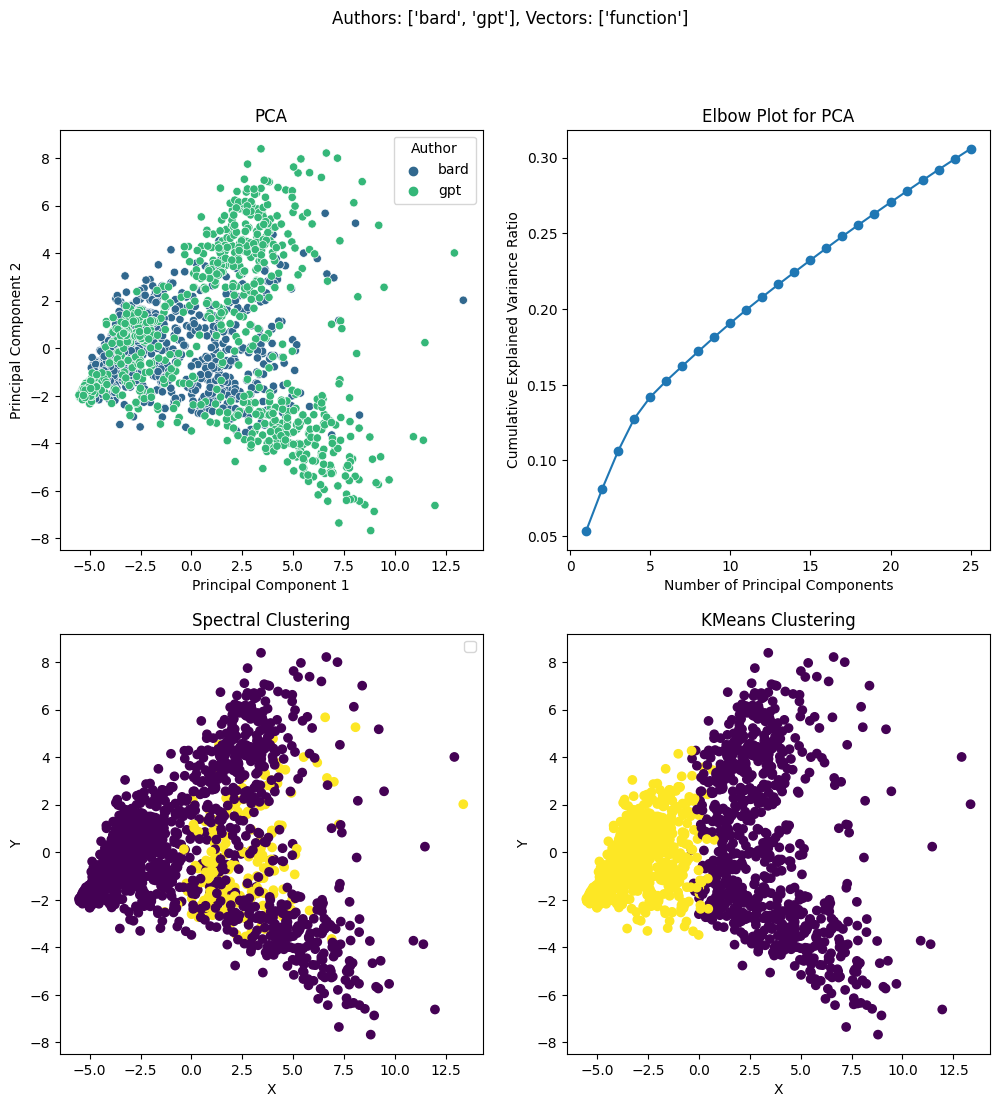

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function'] scores:
KMeans Adjusted Rand Index: 0.10104083830408207
KMeans Rand Index: 0.5505198561601
Spectral Clustering Adjusted Rand Index: 0.062243421824295264
Spectral Clustering Rand Index: 0.5309568480300187


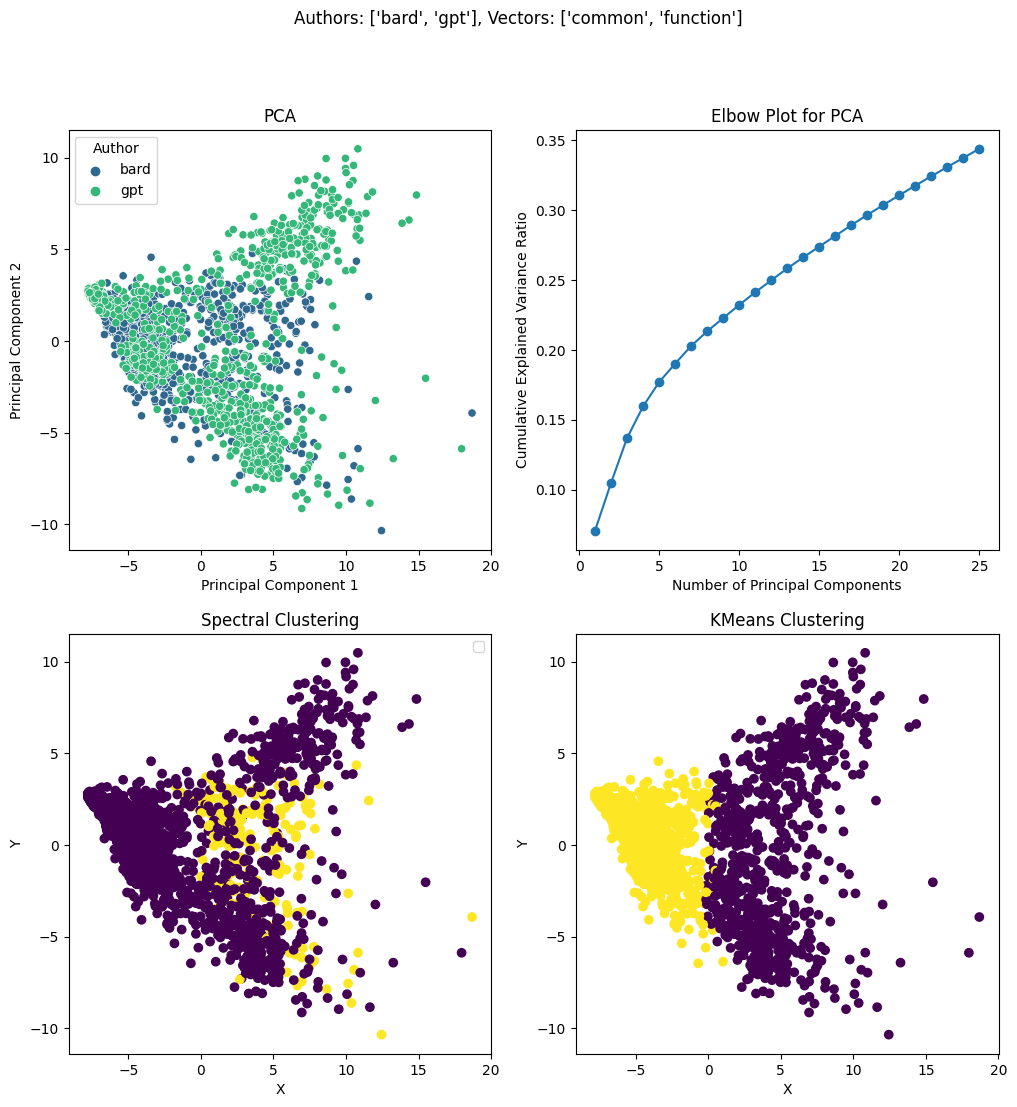

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['bert'] scores:
KMeans Adjusted Rand Index: 0.04250438761327354
KMeans Rand Index: 0.5212288930581613
Spectral Clustering Adjusted Rand Index: 0.01560288938612001
Spectral Clustering Rand Index: 0.5076618198874296


/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function', 'bert'] scores:
KMeans Adjusted Rand Index: 0.04409434397948025
KMeans Rand Index: 0.5220145403377111
Spectral Clustering Adjusted Rand Index: 0.014979755661503868
Spectral Clustering Rand Index: 0.507349124452783


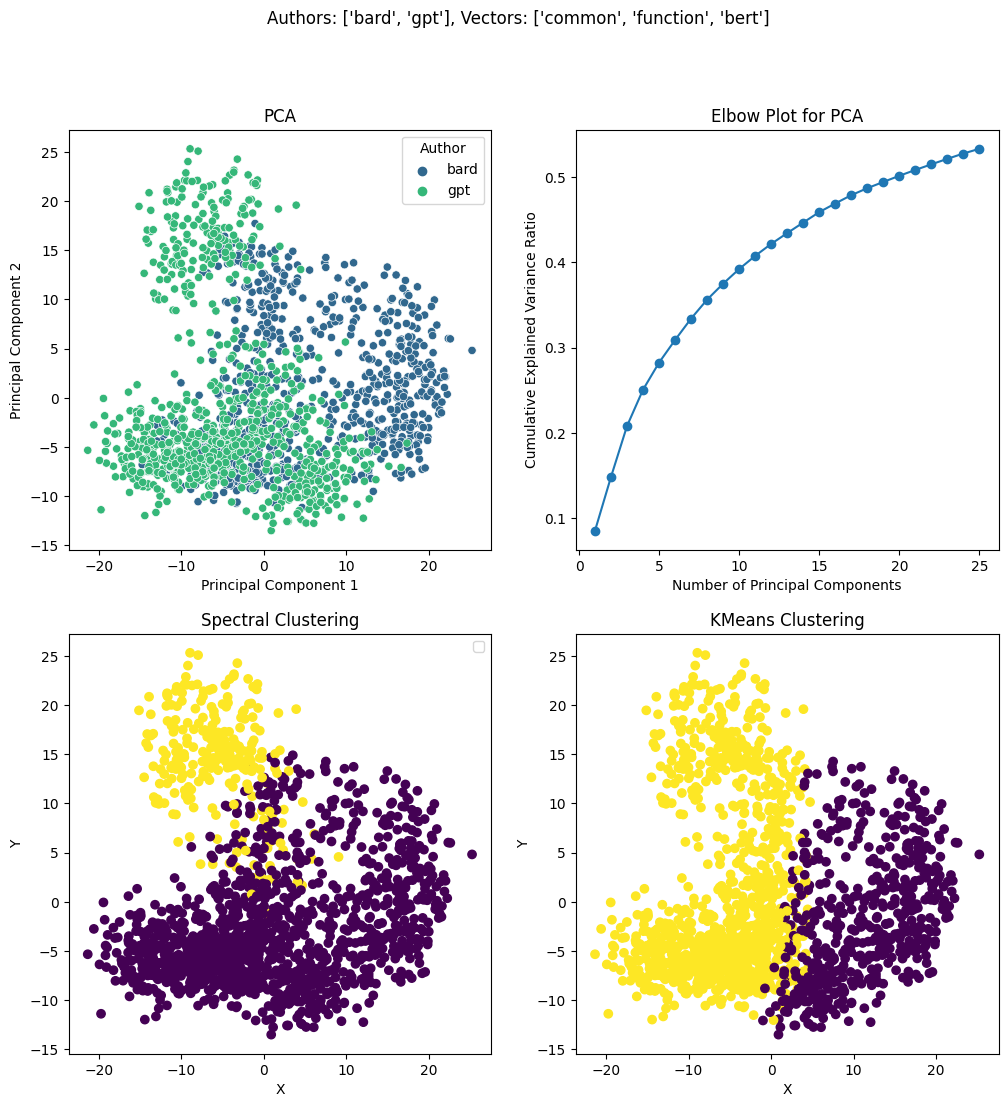

In [6]:
for vector_names in list_of_vector_names:
    cluster_graph(["bard", "gpt"], vector_names)
    print("\n")

# GPT (temp 1.0) vs. Bard vs. Reddit

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common'] scores:
KMeans Adjusted Rand Index: 0.13303494680594918
KMeans Rand Index: 0.587087675420314
Spectral Clustering Adjusted Rand Index: 0.01675473482316552
Spectral Clustering Rand Index: 0.40832325969153815


/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['function'] scores:
KMeans Adjusted Rand Index: 0.1442611963544028
KMeans Rand Index: 0.5908798805057663
Spectral Clustering Adjusted Rand Index: 0.0007936637765716664
Spectral Clustering Rand Index: 0.3469351813255523


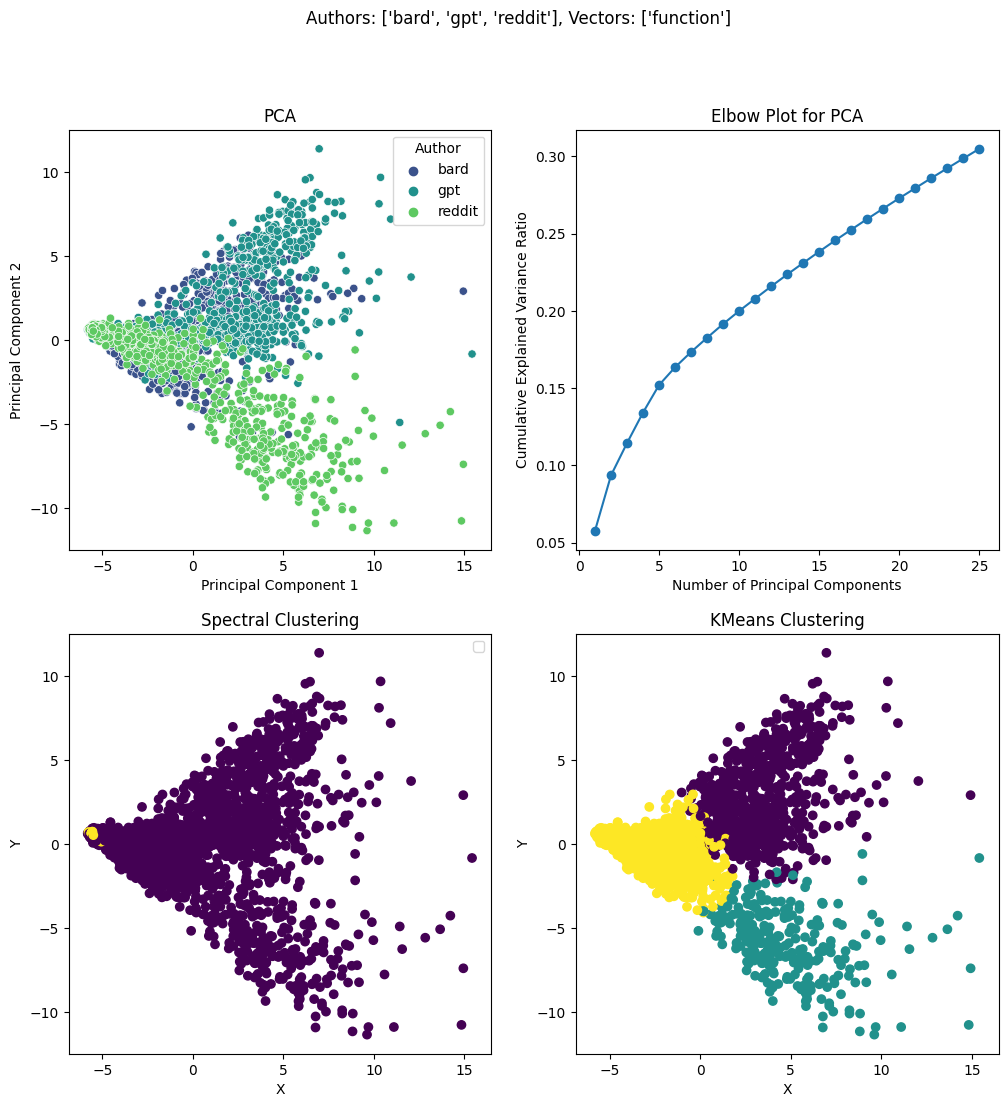

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function'] scores:
KMeans Adjusted Rand Index: 0.1372939468926023
KMeans Rand Index: 0.5869879811032375
Spectral Clustering Adjusted Rand Index: 0.0008538525501746536
Spectral Clustering Rand Index: 0.3464405307767125


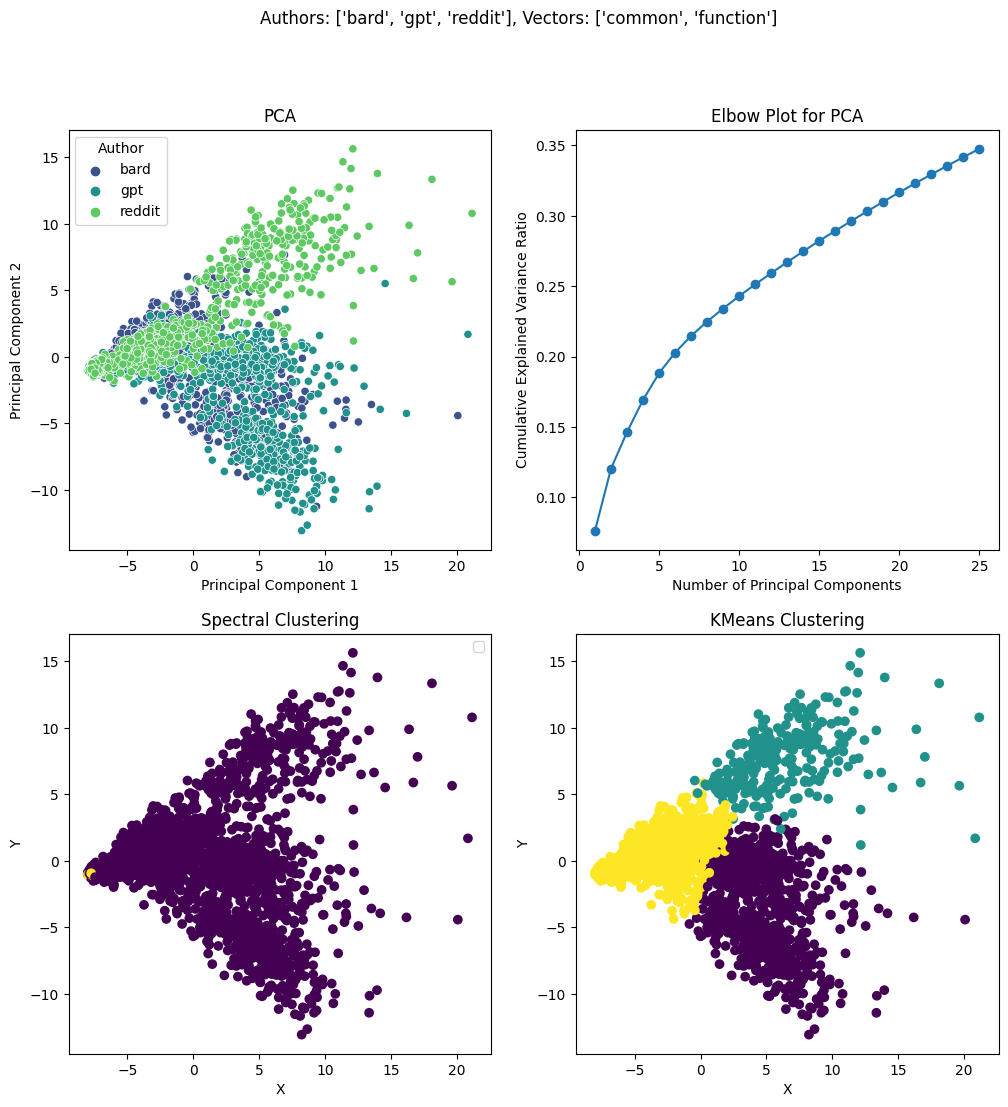

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['bert'] scores:
KMeans Adjusted Rand Index: 0.3870969242748317
KMeans Rand Index: 0.7244824232319022
Spectral Clustering Adjusted Rand Index: 0.023779634756481843
Spectral Clustering Rand Index: 0.39392837293316657


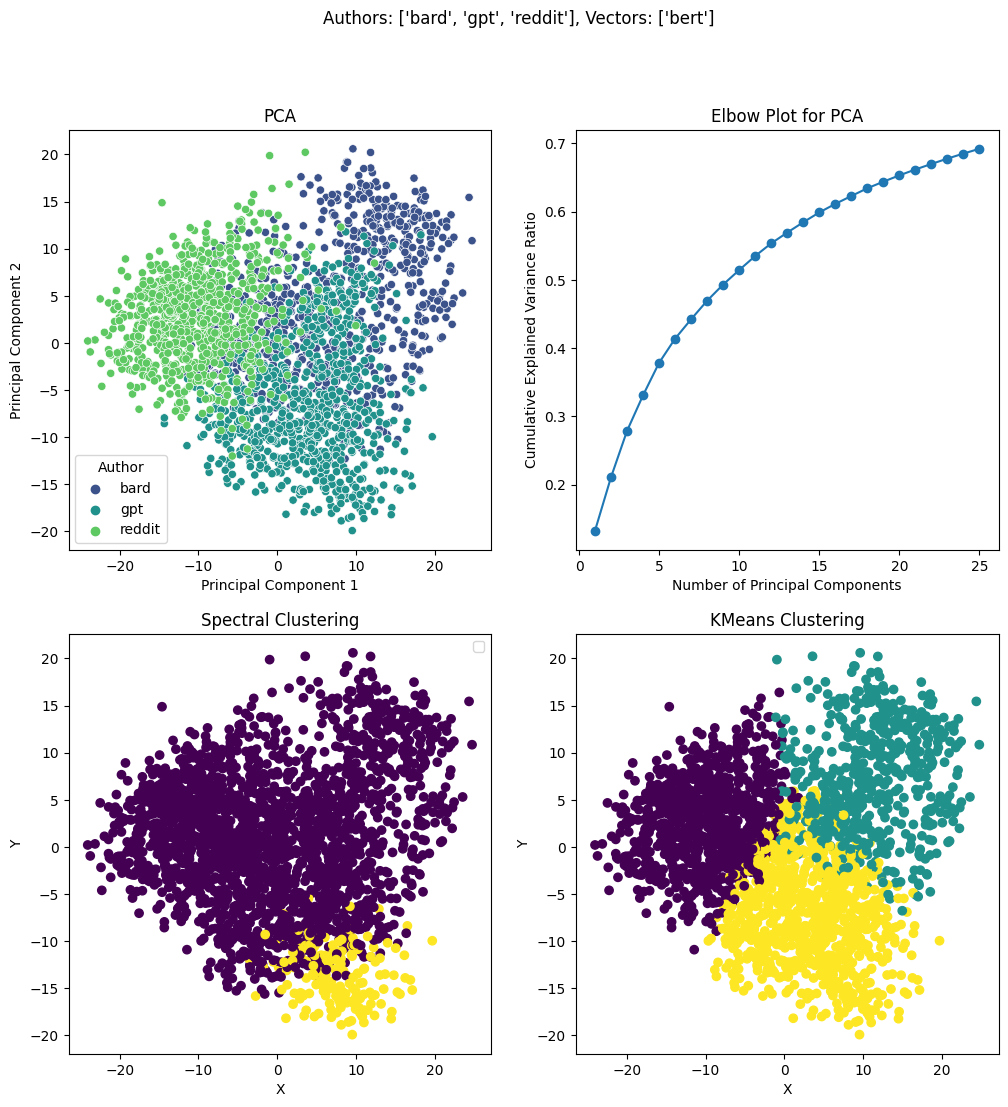

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['common', 'function', 'bert'] scores:
KMeans Adjusted Rand Index: 0.42115007110924335
KMeans Rand Index: 0.7399089898568848
Spectral Clustering Adjusted Rand Index: 0.01803043604513665
Spectral Clustering Rand Index: 0.40629706822287065


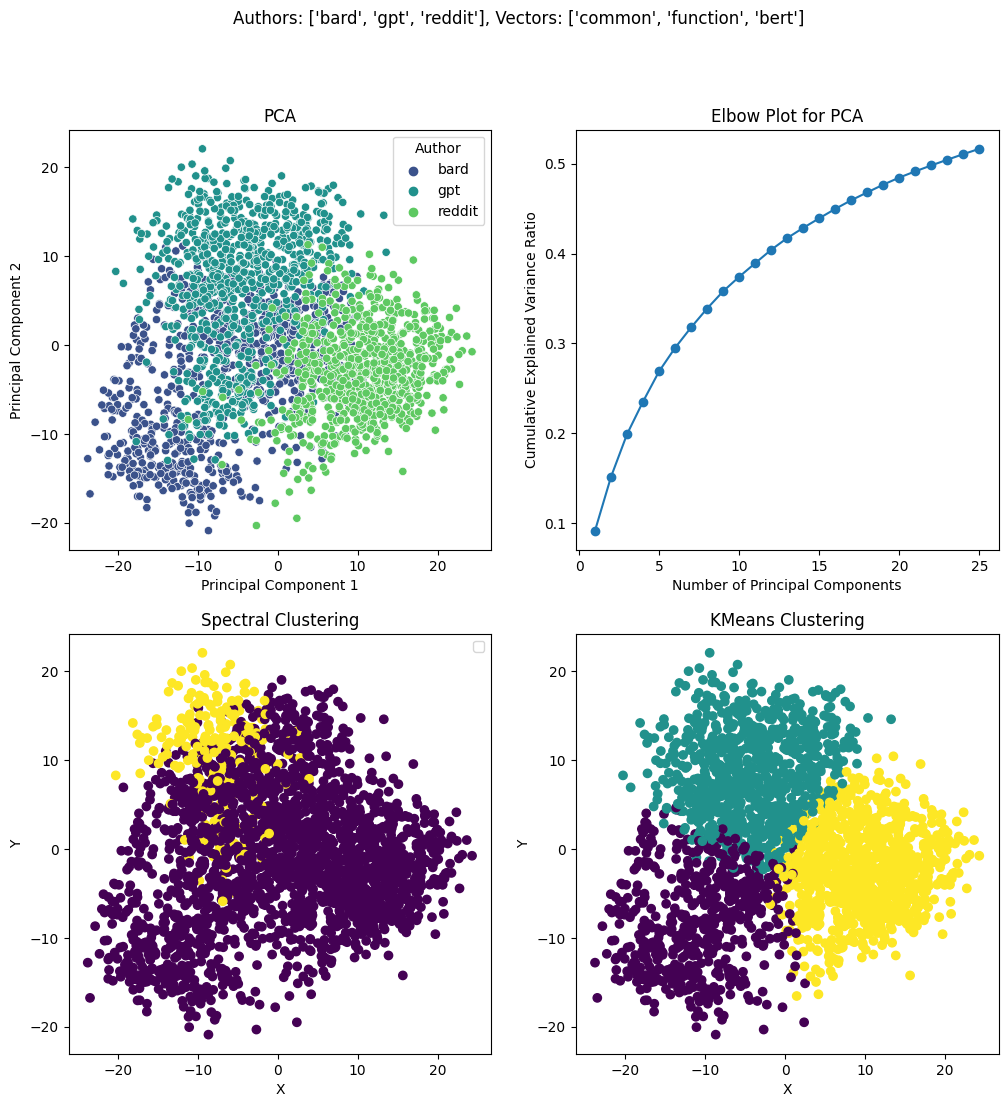

In [7]:
for vector_names in list_of_vector_names:
    cluster_graph(["bard", "gpt", "reddit"], vector_names)
    print("\n")

# Reddit vs. GPT various temps

In [8]:
temps = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8",
         "0.9", "1.0", "1.1", "1.2", "1.3", "1.4", "1.5"]

In [9]:
Kmeans_ari_list = []
Spectral_ari_list = []
for vector_names in list_of_vector_names:
    vector_Kmeans = []
    vector_Spectral = []
    for temp in temps:
        Kmeans_ari, Kmeans_ri, Spectral_ari, Spectral_ri = cluster(["reddit", temp], vector_names)
        vector_Kmeans.append(Kmeans_ari)
        vector_Spectral.append(Spectral_ari)
        #print(f"{vector_names} scores:\n Kmeans_ari: {Kmeans_ari}, Kmeans_ri: {Kmeans_ri}, Spectral_ari: {Spectral_ari}, Spectral_ri: {Spectral_ri},")
    Kmeans_ari_list.append(vector_Kmeans)
    Spectral_ari_list.append(vector_Spectral)

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


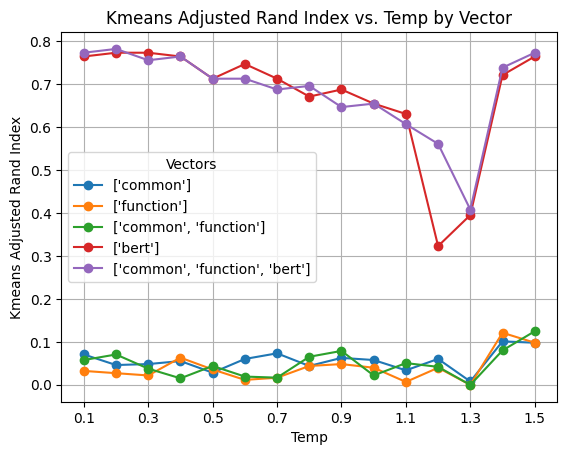

In [10]:
Kmeans_df = pd.DataFrame(Kmeans_ari_list)
Kmeans_df.columns = temps
index = [str(name) for name in list_of_vector_names]
Kmeans_df.index = index

Kmeans_df.T.plot(kind='line', marker='o')
plt.xlabel('Temp')
plt.ylabel('Kmeans Adjusted Rand Index')
plt.title('Kmeans Adjusted Rand Index vs. Temp by Vector')
plt.legend(title='Vectors')
plt.grid(True)
plt.show()

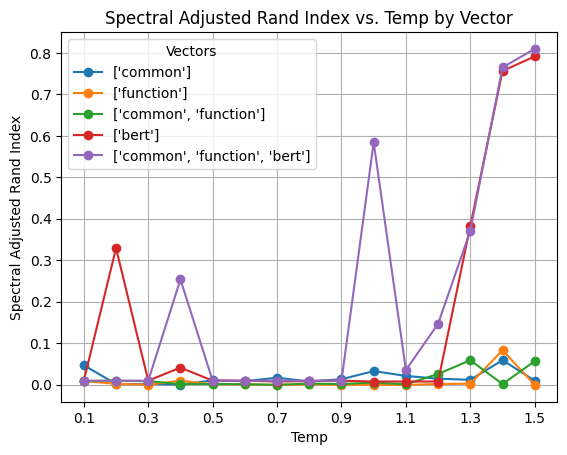

In [11]:
Spectral_df = pd.DataFrame(Spectral_ari_list)
Spectral_df.columns = temps
index = [str(name) for name in list_of_vector_names]
Spectral_df.index = index

Spectral_df.T.plot(kind='line', marker='o')
plt.xlabel('Temp')
plt.ylabel('Spectral Adjusted Rand Index')
plt.title('Spectral Adjusted Rand Index vs. Temp by Vector')
plt.legend(title='Vectors')
plt.grid(True)
plt.show()